In [2]:
import jaxopt
import matplotlib.pyplot as plt
import numpy as np
import optax

from experiments import BPExperiment, ExactMinExperiment
from pauli import all_local_two_body_pauli, all_two_body_pauli
from traps import LocalVQA

# jax.config.update("jax_enable_x64", True)

# Exact min experiments

In [3]:
exp_exact = ExactMinExperiment.load('test')

In [ ]:
qubits = (4,)
layers = (10, 20, 30)

num_samples_per_circuit = 4
num_test_clifford_points = 100
num_test_uniform_points = 10

exp_exact.run(
    qubits, 
    layers, 
    num_samples_per_circuit, 
    num_test_clifford_points, 
    num_test_uniform_points, 
    seed=42)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]


 >>>>>>>>>>compiling<<<<<<<<<<


In [4]:
exp_exact.results

defaultdict(functools.partial(<class 'collections.defaultdict'>, functools.partial(<class 'collections.defaultdict'>, <class 'list'>)),
            {4: defaultdict(functools.partial(<class 'collections.defaultdict'>, <class 'list'>),
                         {10: defaultdict(list,
                                      {'paulis': [['YYII',
                                         'IIYZ',
                                         'IYYI',
                                         'YIIZ'],
                                        ['YXII', 'IXIY', 'IIYY', 'YIYI']],
                                       'rates': [0.13071428571428573,
                                        0.11706666666666667]})})})

In [5]:
2**-4

0.0625

# BP experiments

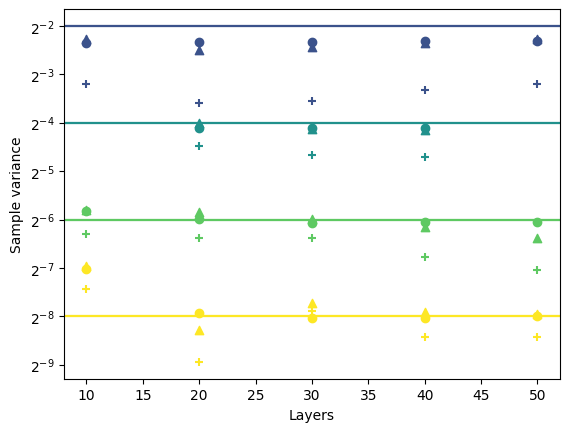

In [6]:
exp1 = BPExperiment.load('test1')

# qubits = range(2, 8+1, 2)
# layers = range(10, 50+1, 10)
# num_samples = 100

exp1.plot_results()


# Exact minimums

In [13]:
'10'

TypeError: sequence item 0: expected str instance, int found

In [7]:
a1 = list(range(10))
a2 = a1

a1, a2

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
def print_k(k):
    for k in range(10):
        k
    
    return k

In [8]:
a2 = list(set(a2) - {1, 2, 3, 15})
a1, a2

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 4, 5, 6, 7, 8, 9])

In [2]:
num_qubits = 10
num_layers = 10
vqa = LocalVQA(num_qubits, num_layers)
rng = np.random.default_rng(42)

x = np.zeros(vqa.num_parameters)
i_fixed = np.array([], dtype=int)
paulis = all_two_body_pauli(num_qubits)

nonzero_paulis = []
while True:
    iteration_successful, pauli, x = find_nonzero_pauli(vqa, paulis, x, i_fixed, rng, num_samples=100)
    
    if not iteration_successful:
        break

    new_fixed = find_indices_of_fixed_angles(vqa, pauli, x)
    i_fixed = np.unique(np.concatenate([i_fixed, new_fixed]))

    paulis.remove(pauli)
    nonzero_paulis.append(pauli)
    
    print(nonzero_paulis, len(i_fixed), vqa.num_parameters)

NameError: name 'LocalVQA' is not defined

In [30]:
vqa= LocalVQA(2, 0)
paulis = ['II', 'ZZ']

print(vqa.qiskit_circuit.draw())
print(vqa._flat_params)

     ┌────────┐┌────────┐
q_0: ┤ Rx(x0) ├┤ Rz(z0) ├
     ├────────┤├────────┤
q_1: ┤ Rx(x1) ├┤ Rz(z1) ├
     └────────┘└────────┘
[Parameter(x0), Parameter(x1), Parameter(z0), Parameter(z1)]


In [25]:
np.vstack([vec, m])

array([[0.        , 1.        , 2.        , 4.        ],
       [0.15184883, 0.54025631, 0.85841882, 0.71945407],
       [0.54526043, 0.18605528, 0.28902469, 0.05481335],
       [0.54907367, 0.59640534, 0.95748073, 0.11858887]])

In [ ]:
y = vqa.random_parameters(num_samples=131, rng=131)
y[:, i_fixed] = x[i_fixed]
values = vqa.expval_vmap(paulis, y)

In [3]:
paulis_fixed = []
for i in range(len(paulis)):
    if not np.allclose(values[:, i], 0) and np.allclose(values[:, i], 1):
        paulis_fixed.append(paulis[i])

NameError: name 'paulis' is not defined

In [ ]:
len(paulis_fixed) / len(paulis), 2**-num_qubits

In [4]:
np.abs(values).mean(axis=0)

NameError: name 'np' is not defined

observables = all_local_two_body_pauli(num_qubits)

num_samples = 300
seed = 41

uniform_variances = vqa.uniform_variance(observables, num_samples=num_samples, rng=seed)
clifford_variances = vqa.clifford_variance(observables, num_samples=num_samples, rng=seed)
print('expected', 2**-num_qubits)
print(f'uniform var: {uniform_variances.mean()} std: {uniform_variances.std()}')
print(f'clifford var: {clifford_variances.mean()} std: {clifford_variances.std()}')

# Shallowing

In [5]:
exp = ShallowingExperiment('95')
schedule = [0.95, 0.96, 0.97, 0.98, 0.99]
num_qubits = 4
num_layers = 50
num_clifford = 5
num_samples = 50
exp.run(num_qubits, num_layers, num_clifford, num_samples, schedule)

NameError: name 'ShallowingExperiment' is not defined

In [6]:
exp.plot_results()
plt.yscale('log')

NameError: name 'exp' is not defined

In [7]:
shexperiment = ShallowingExperiment.load('shtest')

NameError: name 'ShallowingExperiment' is not defined

In [8]:
num_qubits = 6
num_layers = 100
shexperiment.run(num_qubits, num_layers, 5, 50)

NameError: name 'shexperiment' is not defined

In [9]:
shexperiment.plot_results()
plt.yscale('log')

NameError: name 'shexperiment' is not defined

In [10]:
uniform_bp_exp = UniformBPExperiement.load('uniform_test')


NameError: name 'UniformBPExperiement' is not defined

In [11]:
uniform_bp_exp = UniformBPExperiement.load('uniform_test')
uniform_bp_exp.run([8], range(10, 50+1, 10), 10)

NameError: name 'UniformBPExperiement' is not defined

# Uniform BP

In [12]:
uniform_bp_exp.plot_results()

NameError: name 'uniform_bp_exp' is not defined

In [13]:
uniform_bp_exp.results[2][10].mean()

NameError: name 'uniform_bp_exp' is not defined

In [14]:
uniform_bp_exp.save()

NameError: name 'uniform_bp_exp' is not defined

In [15]:
UniformBPExperiement.load(uniform_bp_exp.name)

NameError: name 'UniformBPExperiement' is not defined